In [1]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Replace 'your_dataset_url' with the actual URL or file path on Kaggle
df = pd.read_csv('/kaggle/input/covid19-trial-finder-dataset/COVID-19_trial_semantic_tags_data.csv')
df.head()


,nct_id,entity_source_text,concept_id,concept_name,domain,start_index,end_index,temporal_source_text,days,numeric_source_text,numeric_att_min,numeric_att_max,is_exclusion
0,NCT04363437,diltiazem,1328165,Diltiazem,Drug,1662,1671,NaN,0,NaN,-99999.0,99999.0,1
1,NCT01306084,viral infection,440029,Viral disease,Condition,324,339,NaN,0,NaN,-99999.0,99999.0,0
2,NCT02735707,inotropes,723640,Positive Inotropic Agents,Drug,521,530,NaN,0,NaN,-99999.0,99999.0,0
3,NCT02735707,vasopressor,1507835,Vasopressin (USP),Drug,506,517,NaN,0,NaN,-99999.0,99999.0,0
4,NCT02735707,Non-invasive ventilatory support,44790095,Invasive ventilation,Procedure,438,482,Up to 48 hours after ICU admission,2,NaN,-99999.0,99999.0,0


In [4]:
# Check the data types and missing values
df.info()

# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10223 entries, 0 to 10222
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   nct_id                10223 non-null  object 
 1   entity_source_text    10223 non-null  object 
 2   concept_id            10223 non-null  int64  
 3   concept_name          10223 non-null  object 
 4   domain                10223 non-null  object 
 5   start_index           10223 non-null  int64  
 6   end_index             10223 non-null  int64  
 7   temporal_source_text  5273 non-null   object 
 8   days                  10223 non-null  int64  
 9   numeric_source_text   1752 non-null   object 
 10  numeric_att_min       10223 non-null  float64
 11  numeric_att_max       10223 non-null  float64
 12  is_exclusion          10223 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.0+ MB


nct_id                     0
entity_source_text         0
concept_id                 0
concept_name               0
domain                     0
start_index                0
end_index                  0
temporal_source_text    4950
days                       0
numeric_source_text     8471
numeric_att_min            0
numeric_att_max            0
is_exclusion               0
dtype: int64

In [6]:
import pandas as pd

# Load your dataset (replace with your actual data loading method)
df = pd.read_csv('/kaggle/input/covid19-trial-finder-dataset/COVID-19_trial_semantic_tags_data.csv')

# Identify numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

print("Numeric columns:", numeric_cols)
print("Non-numeric columns:", non_numeric_cols)


Numeric columns: Index(['concept_id', 'start_index', 'end_index', 'days', 'numeric_att_min',
       'numeric_att_max', 'is_exclusion'],
      dtype='object')
Non-numeric columns: Index(['nct_id', 'entity_source_text', 'concept_name', 'domain',
       'temporal_source_text', 'numeric_source_text'],
      dtype='object')


In [7]:
from sklearn.impute import SimpleImputer

# Impute missing values in numeric columns with the mean
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])


In [8]:
# Impute missing values in non-numeric columns with the most frequent value
non_numeric_imputer = SimpleImputer(strategy='most_frequent')
df[non_numeric_cols] = non_numeric_imputer.fit_transform(df[non_numeric_cols])


In [9]:
# Convert non-numeric columns using one-hot encoding
df = pd.get_dummies(df, columns=non_numeric_cols)


In [10]:
# Display the first few rows of the processed dataframe
print(df.head())


   concept_id  start_index  end_index  days  numeric_att_min  numeric_att_max  \
0   1328165.0       1662.0     1671.0   0.0         -99999.0          99999.0   
1    440029.0        324.0      339.0   0.0         -99999.0          99999.0   
2    723640.0        521.0      530.0   0.0         -99999.0          99999.0   
3   1507835.0        506.0      517.0   0.0         -99999.0          99999.0   
4  44790095.0        438.0      482.0   2.0         -99999.0          99999.0   

   is_exclusion  nct_id_NCT01306084  nct_id_NCT02735707  nct_id_NCT03348670  \
0           1.0               False               False               False   
1           0.0                True               False               False   
2           0.0               False                True               False   
3           0.0               False                True               False   
4           0.0               False                True               False   

   ...  numeric_source_text_three or m

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame
# Target column
target_column = 'is_exclusion'

# Features: Dropping the target column from the features
X = df.drop(target_column, axis=1)

# Target
y = df[target_column]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.93


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('/kaggle/input/covid19-trial-finder-dataset/COVID-19_trial_semantic_tags_data.csv')

# Identify numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = df.select_dtypes(include=['object']).columns

# Impute missing values for numeric columns
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=non_numeric_cols)

# Define target and features
target_column = 'is_exclusion'
X = df.drop(target_column, axis=1)
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Logistic Regression Classification Report
              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81       602
         1.0       0.92      0.92      0.92      1443

    accuracy                           0.89      2045
   macro avg       0.87      0.87      0.87      2045
weighted avg       0.89      0.89      0.89      2045

[[ 490  112]
 [ 115 1328]]


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix_rf)


Random Forest Classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87       602
         1.0       0.94      0.95      0.95      1443

    accuracy                           0.93      2045
   macro avg       0.91      0.91      0.91      2045
weighted avg       0.92      0.93      0.92      2045

[[ 518   84]
 [  69 1374]]


In [15]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Predict on test set
y_pred_gb = gb.predict(X_test)

# Evaluate the model
print("Gradient Boosting Classification Report")
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print(conf_matrix_gb)


Gradient Boosting Classification Report
              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76       602
         1.0       0.89      0.92      0.91      1443

    accuracy                           0.87      2045
   macro avg       0.84      0.83      0.83      2045
weighted avg       0.86      0.87      0.86      2045

[[ 439  163]
 [ 112 1331]]


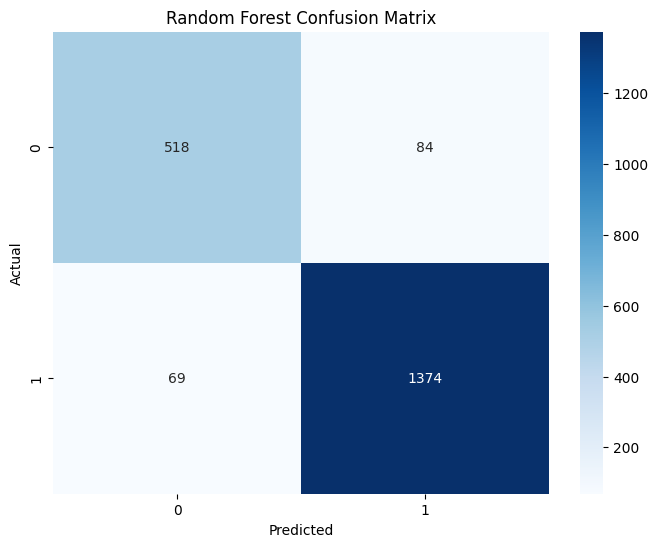

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


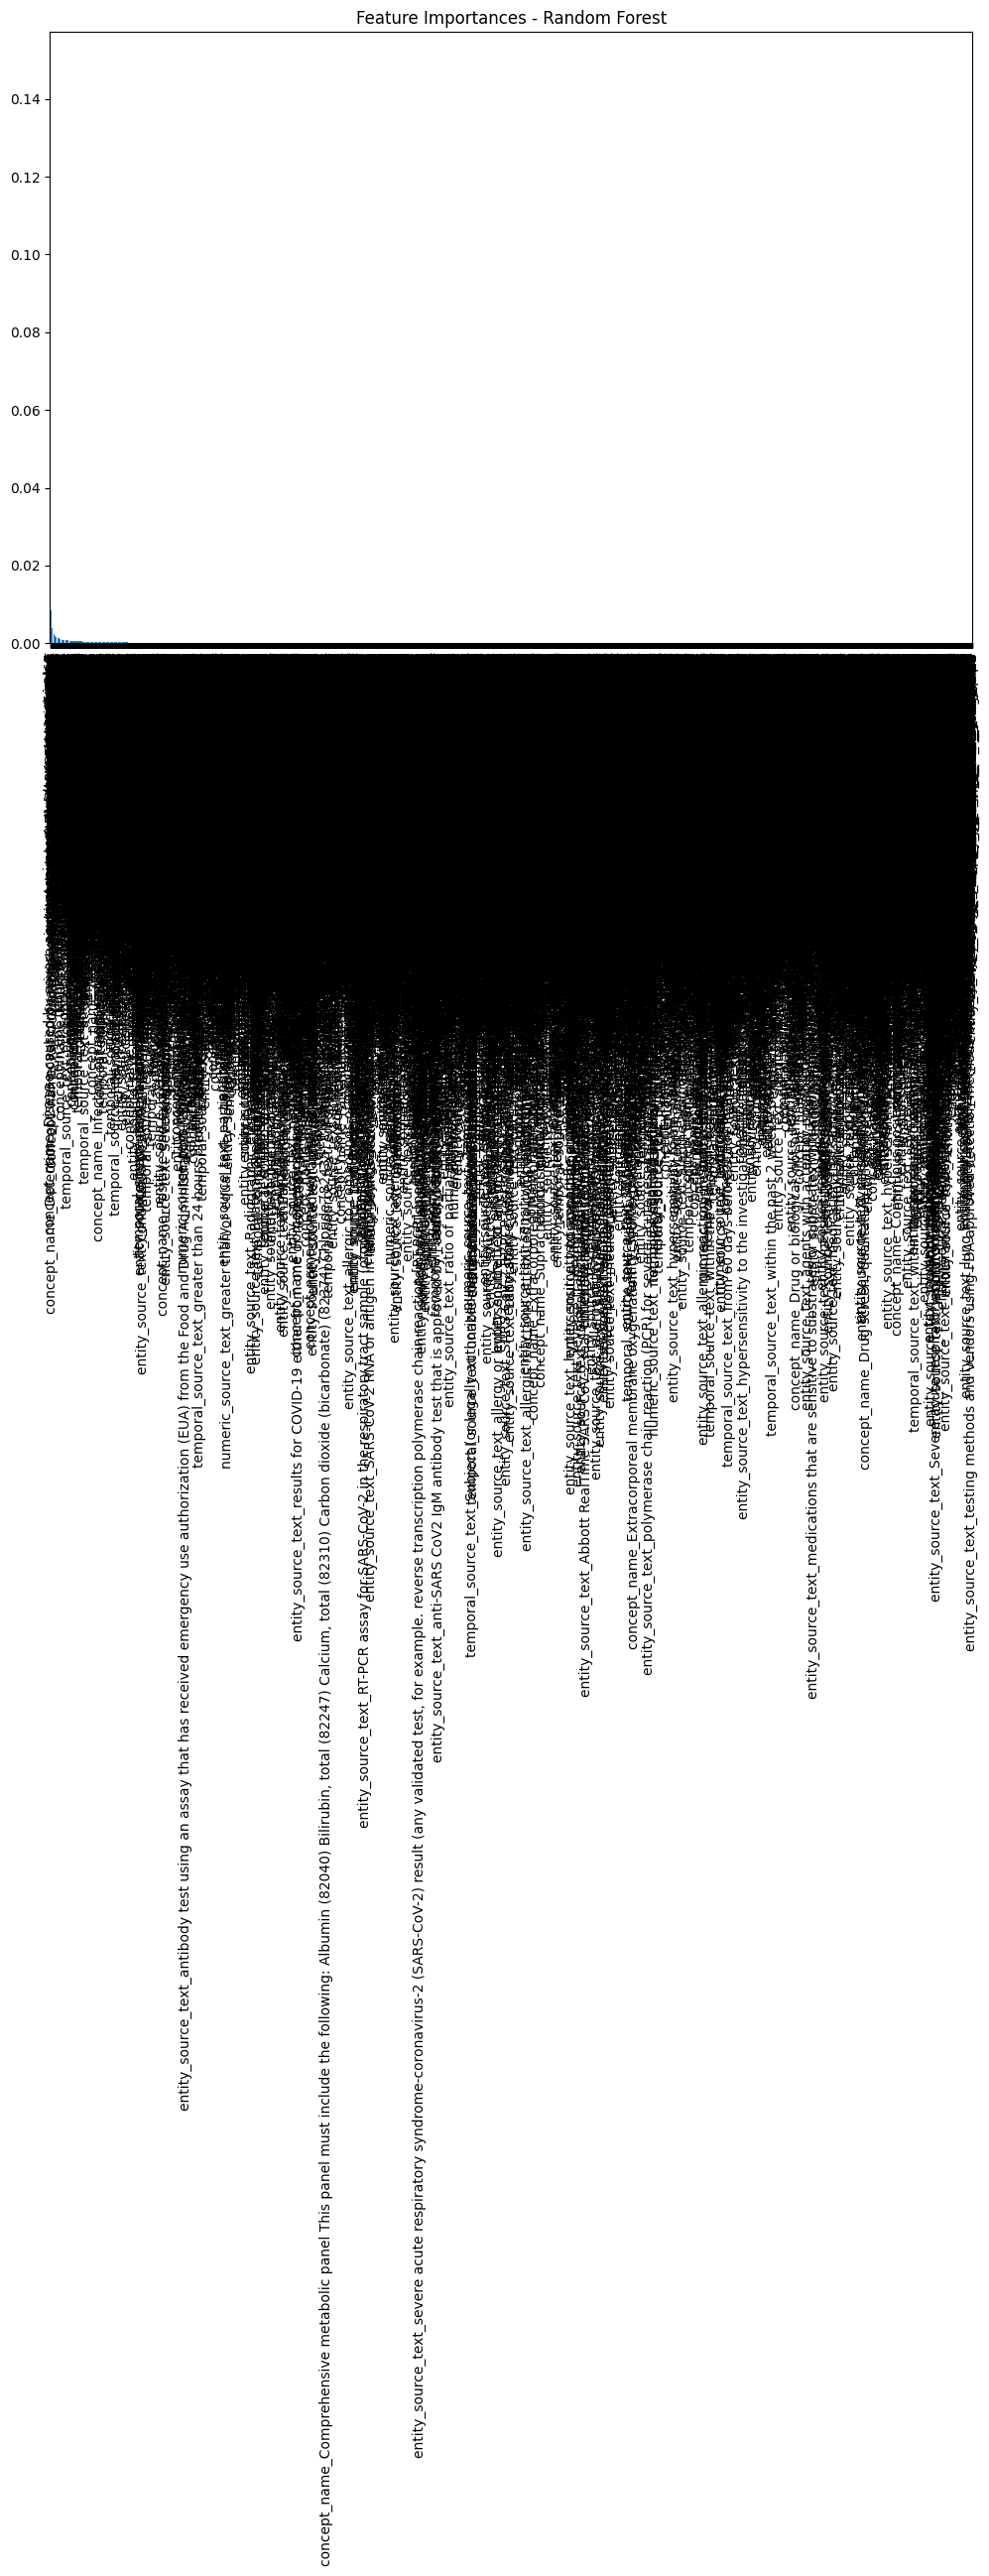

In [17]:
# Feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


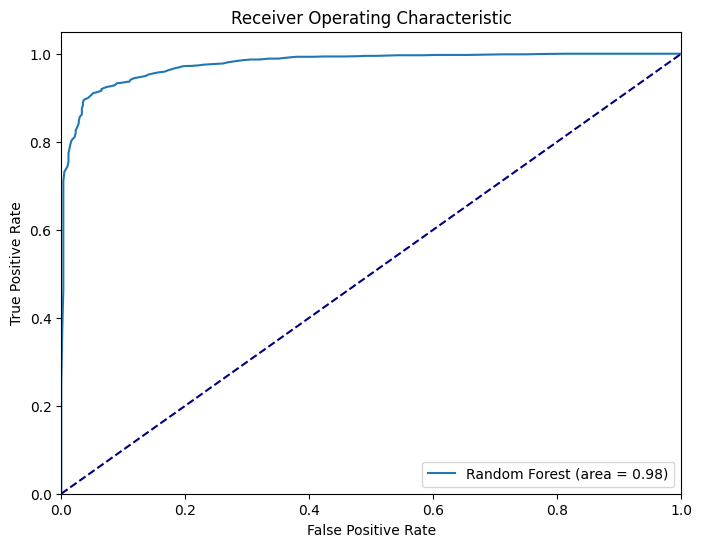

In [18]:
from sklearn.metrics import roc_curve, auc

# ROC Curve for Random Forest
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
